In [20]:
### importing libraries
import pandas as pd
import numpy as np
from sklearn import linear_model

In [21]:
## loading the dataset
dataset = pd.read_csv('/Users/VP/Downloads/final_boys_modeling.csv')

In [22]:
### fixing the runner id problem in the data set
dataset['RunnerID_1'] = dataset['RunnerID'].str.split("-").str[0]
dataset['RunnerID_1'].fillna(dataset['RunnerID'],inplace = True)
dataset['RunnerID_1']
dataset = dataset.drop('RunnerID',axis = 1)
dataset = dataset.rename(columns ={ 'RunnerID_1' :'RunnerID'})
## converting the classification as categories 
dataset['Classification'] = dataset['Classification'].astype("category")
dataset['Classification_cat'] = dataset['Classification'].cat.codes


In [23]:
## creatin the validation dataset - containing one meet
## since we need to calculate students performance for one meet, we are removing a particular meet as validation (test set)
## this meet has around 163 participants. 
validation = dataset[(dataset['DATE'] == '11/28/15') & (dataset['meet'] == 'Foot Locker South Regional')]


In [24]:
## removing the validation data frm the training dataset
dataset = dataset.drop(dataset.index[(dataset.DATE == '11/28/15') & (dataset.meet == 'Foot Locker South Regional' )])


#### get the mean time and min time for each player in the dataset

In [25]:
### getting the minimum time , average and std of each player in the data set
timedetails = dataset.groupby(['RunnerID']).agg({'time_sec':{"time_sec_min":"min","time_sec_mean" :"mean","time_sec_std" : "std"}}).reset_index()


In [26]:
## adding the  the minimum time, std  and average for each player in the training set
dataset1 = pd.merge(timedetails,dataset,on = "RunnerID",how = "right")

In [27]:
## adding the min time and average time for each player in validation set
validation1 = pd.merge(timedetails,validation,on = "RunnerID",how = "right")
validation1.to_csv("/Users/VP/Downloads/validation1.csv")
dataset1.to_csv("/Users/VP/Downloads/dataset1.csv")

### Start the prediction preparation from here

In [127]:

## loading in the validation and training sets 
## before proceeding with prediction, open the validation dataset remove "#VALUE!" and "#NUM!" (junk values) from the dataset.
## remove the etc runnerid column in both dataset and validation set, since they were created as a result of merge
## rename the data set and validation set's runner id , mean time and min time in the csv and import them back here!
## there one student who has only one record , so the std for that person will be null, that needs to be 0 too(changed in the file)
validation = pd.read_csv("/Users/VP/Downloads/validation1.csv")
dataset = pd.read_csv("/Users/VP/Downloads/dataset1.csv")

In [128]:
### fixing the columns to use for prediction
#cols = ['Classification_cat','time_sec_min','time_sec_mean','time_sec_std']
cols = ['RunnerID','Classification_cat','time_sec_min','time_sec_mean','time_sec_std','Temp_Celcius','ELEVATION','Dew_Point_Celc','RegioninNC_cat']


In [129]:
## filling in the null values and converting the elevation and dew point as categories
dataset.Temp_Celcius.fillna(dataset['Temp_Celcius'].mean(),inplace =True)
from sklearn import preprocessing
dataset['Elevation_Cat'] = dataset['Elevation_Cat'].astype("category")
dataset['Dew_Point_Cat'] = dataset['Dew_Point_Cat'].astype("category")
dataset.ELEVATION.fillna(dataset['ELEVATION'].mean(),inplace =True)
dataset.Dew_Point_Celc.fillna(dataset['Dew_Point_Celc'].mean(),inplace =True)
## convert region in NC to a categorical variable
dataset['RegioninNC'] = dataset['RegioninNC'].astype("category")
dataset['RegioninNC_cat'] = dataset['RegioninNC'].cat.codes
dataset.RegioninNC_cat.fillna(1,inplace =True)
## convert classfication to a categorical variable
dataset.Dew_Point_Cat.fillna(2,inplace =True)
## converting runnerid as category
dataset['RunnerID'] = dataset['RunnerID'].astype("category")
# Training data
X = dataset[cols]
## Training label 
y = dataset[['time_sec']]
## standardizing the data in the training set ( It does not produce much effect though!)
standardized_X = preprocessing.scale(X)


In [130]:
## fitting the linear model(Lasso regularized)
lm = linear_model.Lasso(alpha = 0.5)
model = lm.fit(X,y)
predictions = lm.predict(X)

In [131]:
## making changes in the elevation and category values 
validation.Temp_Celcius.fillna(validation['Temp_Celcius'].mean(),inplace =True)
validation['Classification_cat'] = validation['Classification_cat'].astype("category")
validation['Elevation_Cat'] = validation['Elevation_Cat'].astype("category")
validation['Dew_Point_Cat'] = validation['Dew_Point_Cat'].astype("category")
## region in NC to category
validation['RegioninNC'] = validation['RegioninNC'].astype("category")
validation['RegioninNC_cat'] = validation['RegioninNC'].cat.codes
validation.RegioninNC_cat.fillna(1,inplace =True)
# use the same columns as that of the training dataset. 
validation[cols]
validation.ELEVATION.fillna(validation['ELEVATION'].mean(),inplace =True)
validation.Dew_Point_Celc.fillna(validation['Dew_Point_Celc'].mean(),inplace =True)
validation['RunnerID'] = validation['RunnerID'].astype("category")


,Unnamed: 0,RunnerID,time_sec_mean,time_sec_std,time_sec_min,ID,first,last,school,class_status_cat,...,LONGITUDE,HOURLYDRYBULBTEMPF,HOURLYRelativeHumidity,year,Temp_Celcius,Dew_Point_Celc,Elevation_Cat,Dew_Point_Cat,Classification_cat,RegioninNC_cat
0,0,1048092,1077.561538,47.978304,999.00,58338,Grant,Wood,Cuthbertson High School,Senior,...,-80.9552,60,72,2015,15.555556,10.52695,1,1,2,1
1,1,1642730,1153.259143,90.981160,1053.00,58193,Noah,Berens,Charlotte Latin,Senior,...,-80.9552,60,72,2015,15.555556,10.52695,1,1,2,1
2,2,1642788,1201.036500,120.906154,1054.00,58189,Vance,Ayscue,Providence Day School,Senior,...,-80.9552,60,72,2015,15.555556,10.52695,1,1,2,1
3,3,1664911,1430.820000,112.527230,1307.00,58265,Patrick,Little,Charlotte Catholic,Junior,...,-80.9552,60,72,2015,15.555556,10.52695,1,1,2,1
4,4,1720278,1104.296875,73.459958,1012.40,58199,Frank,Bragg,Community School of Davidson,Senior,...,-80.9552,60,72,2015,15.555556,10.52695,1,1,0,1
5,5,1720298,1128.032353,58.633710,1056.00,58240,William,Gosnell,Community School of Davidson,Senior,...,-80.9552,60,72,2015,15.555556,10.52695,1,1,0,1
6,6,2215639,1141.676471,61.591188,1066.80,58331,Ian,Wessner,Community School of Davidson,Sophomore,...,-80.9552,60,72,2015,15.555556,10.52695,1,1,0,1
7,7,2215640,1538.307143,144.915086,1372.50,58213,Luke,Cortese,Community School of Davidson,Senior,...,-80.9552,60,72,2015,15.555556,10.52695,1,1,0,1
8,8,2215661,1015.869231,26.620775,978.00,58261,Andrew,Kiss,Providence,Sophomore,...,-80.9552,60,72,2015,15.555556,10.52695,1,1,3,1
9,9,2239005,1113.215385,48.145541,1063.50,58301,Kenny,Schild,Lincoln Charter,Sophomore,...,-80.9552,60,72,2015,15.555556,10.52695,1,1,0,1


In [132]:
## printing sample predictions and equation coefficients. 
print(predictions)[0:5]
lm.coef_

[ 1207.98852141  1218.77348046  1232.45330568  1231.94548198  1190.00942558]


array([ -1.43704404e-06,  -2.69767093e-01,   8.71756207e-03,
         9.66732463e-01,   1.32318545e-02,   1.49176575e+00,
         3.70989609e-02,   2.54759045e+00,  -2.15778196e-01])

In [160]:
## predicting the validation data
X_new = validation[cols]
standardized_X_new = preprocessing.scale(X_new)
predictions = lm.predict(X_new)
## to see the difference between the actual and predicted times
len(predictions)
print(predictions)[0:5]
print validation['time_sec'][0:5]

[ 1067.04437881  1140.40894585  1187.00146526  1411.20351701  1092.91785518]
0    1022
1    1116
2    1107
3    1560
4    1127
Name: time_sec, dtype: int64


In [134]:
## calculating score
from sklearn.metrics import r2_score
Y_true = validation['time_sec']
Y_pred = predictions
lm.score(X,y)

0.76244016497008416

In [135]:
## calculating r2
r2_score(Y_true, Y_pred)

0.7221144841503282

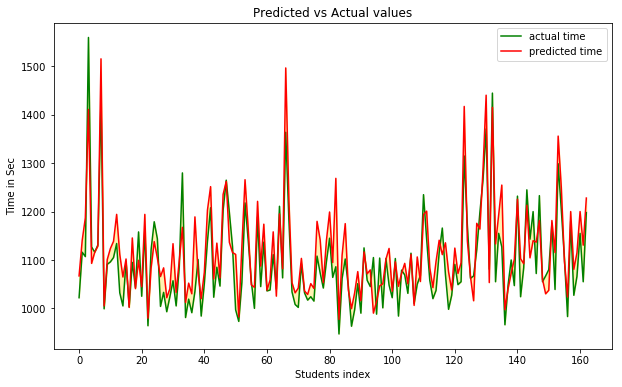

In [149]:
import matplotlib.pyplot as plt
#plt.Line2D(X_new['RunnerID'], Y_true,  color='black')
plt.title("Predicted vs Actual values")
plt.plot(X_new.index.values, Y_true,  color='green', label = "actual time")
plt.plot(X_new.index.values, Y_pred, color='red',label = "predicted time")
X_new1 = pd.DataFrame(X_new.index.values)
k = np.array(X_new1)
Y = pd.DataFrame(Y_pred)
Y1 = np.array(Y[0])
plt.legend()
plt.xlabel("Students index")
plt.ylabel("Time in Sec")
plt.rcParams['figure.figsize'] = (20,6)
plt.fill_between( X_new.index.values, Y1, Y_true , color = 'gold',alpha = 0.3)
plt.show()

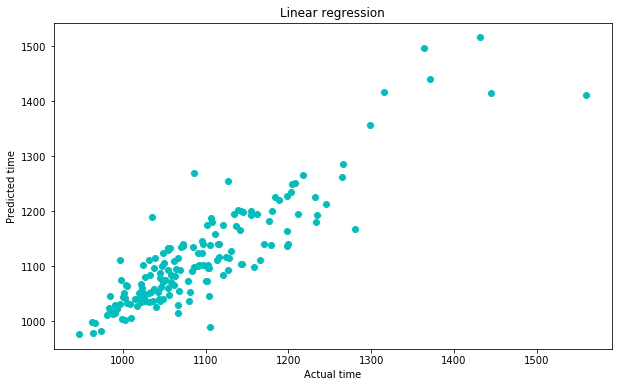

In [151]:
plt.clf
plt.legend()
plt.title("Linear regression")
plt.xlabel("Actual time")
plt.ylabel("Predicted time")
plt.rcParams['figure.figsize'] = (10,6)
plt.plot(Y_true, Y_pred,'co')
plt.show()

## MODEL 2 - using OLS 

In [152]:
import pandas as pd
import statsmodels.formula.api as sm
import statsmodels.regression.linear_model as ols

In [153]:
#df = pd.DataFrame({"A": [10,20,30,40,50], "B": [20, 30, 10, 40, 50], "C": [32, 234, 23, 23, 42523]})
result = sm.ols(formula="time_sec ~  Classification_cat + time_sec_min + time_sec_mean + time_sec_std+ Temp_Celcius + ELEVATION + Dew_Point_Celc + RegioninNC_cat ", data=dataset).fit()

In [154]:
y_hat_no_int = result.predict(validation[cols])
y_hat_no_int

0      1065.074574
1      1138.927030
2      1185.245028
3      1408.834179
4      1093.129160
5      1116.248587
6      1129.519986
7      1515.207009
8      1004.297023
9      1101.947982
10     1124.535770
11     1136.057884
12     1193.931023
13     1112.113327
14     1065.533289
15     1102.727644
16     1000.548886
17     1145.534649
18     1048.679017
19     1097.254128
20     1044.742954
21     1194.233701
22      979.816101
23     1083.241991
24     1137.584932
25     1103.821379
26     1068.835382
27     1081.509782
28     1022.037709
29     1040.516615
          ...     
133    1135.297441
134    1194.768496
135    1256.115881
136    1000.364740
137    1042.840649
138    1074.993509
139    1103.525446
140    1227.266222
141    1104.596248
142    1094.508243
143    1216.346639
144    1106.602393
145    1143.384342
146    1137.760802
147    1183.461928
148    1063.844685
149    1034.007094
150    1040.562318
151    1186.251831
152    1118.836160
153    1358.237044
154    1252.

In [155]:
result.rsquared

0.76240533437493607

In [156]:
result.params

Intercept            -37.352369
Classification_cat    -0.958933
time_sec_min           0.009798
time_sec_mean          0.962639
time_sec_std           0.010554
Temp_Celcius           1.512424
ELEVATION              0.042252
Dew_Point_Celc         2.532018
RegioninNC_cat        -2.809811
dtype: float64

In [157]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               time_sec   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                 2.980e+04
Date:                Fri, 04 Aug 2017   Prob (F-statistic):               0.00
Time:                        23:32:19   Log-Likelihood:            -4.3369e+05
No. Observations:               74301   AIC:                         8.674e+05
Df Residuals:                   74292   BIC:                         8.675e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -37.3524      3.312    -11.278      0.000     -43.844     -30.861
Classification_cat    -0.9589      0.346     -2.773      0.006      -1.637      -0.281
time_sec_min           0.0098      0.012      0.801      0.423      -0.014       0.034
time_sec_mean          0.9626      0.011     86.090      0.000       0.941       0.985
time_sec_std           0.0106      0.012      0.862      0.389      -0.013       0.035
Temp_Celcius           1.5124      0.052     29.018      0.000       1.410       1.615
ELEVATION              0.0423      0.002     17.612      0.000       0.038       0.047
Dew_Point_Celc         2.5320      0.059     42.768      0.000       2.416       2.648
RegioninNC_cat        -2.8098      0.741     -3.790      0.000      -4.263      -1.357
==============================================================================
Omnibus:                    48219.484   Durbin-Watson:                   1.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2717784.514
Skew:                           2.458   Prob(JB):                         0.00
Kurtosis:                      32.218   Cond. No.                     1.84e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Regression Summary

In [158]:
result.rsquared

0.76240533437493607